In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%precision 3
sns.set()
import sklearn


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=12)

models = {
    'KNN' : KNeighborsClassifier(),
    'bagging' : BaggingClassifier(KNeighborsClassifier(), n_estimators=100, random_state=12)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)

pd.Series(scores).unstack()

,test_score,train_score
KNN,0.916084,0.946009
bagging,0.930070,0.948357


In [23]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, random_state=12)

models = {
    'SVM' : SVC(kernel='rbf', random_state=12),
    'bagging' : BaggingClassifier(SVC(kernel='rbf'), n_estimators=10, max_samples=0.5, max_features=0.9)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
SVM,0.973684,0.982143
bagging,0.947368,0.928571


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston

boston = load_boston()
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state=12)

models = {
    'tree' : DecisionTreeRegressor(random_state=12),
    'Adaboost' : AdaBoostRegressor(DecisionTreeRegressor(), random_state=12,n_estimators=100)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
Adaboost,0.880765,0.999691
tree,0.750811,1.000000


In [69]:
iris = load_iris()

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, random_state=12)

models = {
    'tree' : DecisionTreeRegressor(random_state=12),
    'Adaboost' : AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=3200,learning_rate=0.9)
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
Adaboost,0.960905,1.0
tree,0.921811,1.0


In [73]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

boston = load_boston()

X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, random_state=12)

models = {
    'RandomForest' : RandomForestRegressor(random_state=12),
    'GradientBoost' : GradientBoostingRegressor(random_state=12)
}

scores ={}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.876570,0.981031
RandomForest,0.873132,0.982078


<AxesSubplot:>

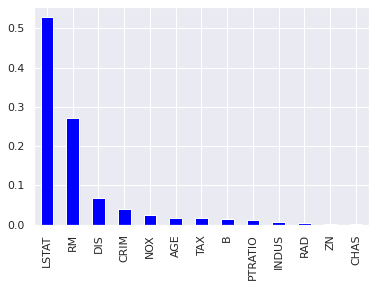

In [77]:
#feature_importances 추출
s = pd.Series(models['RandomForest'].feature_importances_, index = boston.feature_names)
s.sort_values(ascending=False).plot.bar(color='Blue')

In [80]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

iris = load_iris()

X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=12)

models = {
    'RandomForest' : RandomForestClassifier(random_state=0),
    'GradientBoost' : GradientBoostingClassifier(random_state=0)
}

scores ={}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    scores[(model_name, 'train_score')] = model.score(X_train, Y_train)
    scores[(model_name, 'test_score')] = model.score(X_test, Y_test)
    
pd.Series(scores).unstack()

,test_score,train_score
GradientBoost,0.921053,1.0
RandomForest,0.921053,1.0
